Erstellung der Darstellungen für den Vergleich von CNN und CRNN.

In [2]:
from ipynb.fs.full.history_nb import *
from ipynb.fs.full.plot import *

Die ersten Bezeichnungen, die in der Ausgabe erscheinen wie "gpu3_cRnn_drop_best_3_100_7.json", sind die besten Trainingsdurchläufe einer Variante.

best histories:
gpu3_cnn_drop_best_100_11.json
gpu3_cRnn_drop_best_3_100_7.json
gpu3_cnn_drop_best_200_12.json
gpu3_cRnn_drop_best_3_200_18.json
gpu3_cnn_drop_best_300_22.json
gpu3_cRnn_drop_best_3_300_2.json


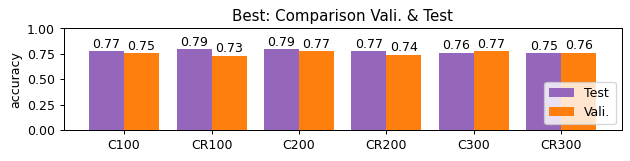

In [5]:
''' 
############### CNN, CRNN Comparison ################

'''
# define 
folder = 'mirror_eval_cnn_cRnn'
template_path = folder + '/cnn_100/gpu3_cnn_drop_best_100_0'

subfolders = ['cnn_100','cRnn_100','cnn_200','cRnn_200','cnn_300','cRnn_300'] #'cnn_50','cRnn_50',

# CNN: get best and avgs
folder_hist_list = get_histories_of_subfolders(subfolders, folder)
print('best histories:')
best, avgs = get_best_and_avgs(folder_hist_list, template_path)

# graph settings  
labels = ['C100','CR100','C200','CR200','C300','CR300']#'C50','CR50',
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:cyan']

# only the best one training
############# top ###############
evaluate_bar_plot(best, labels, 'accuracy', window=[0, 1], figsize=(8, 1.5), titel_add='Best')

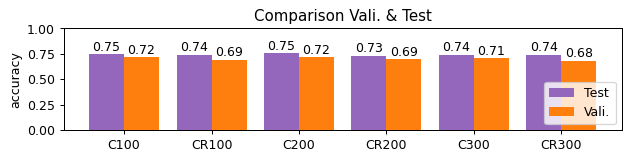

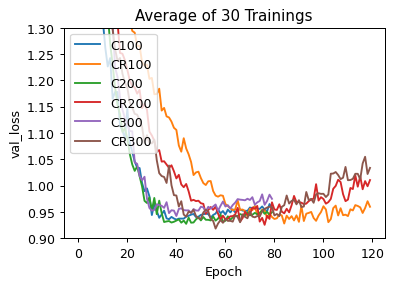

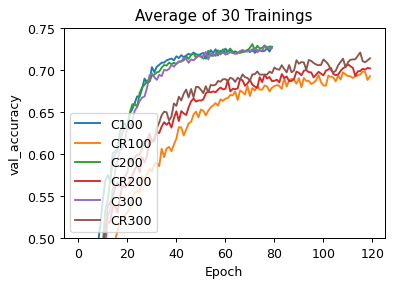

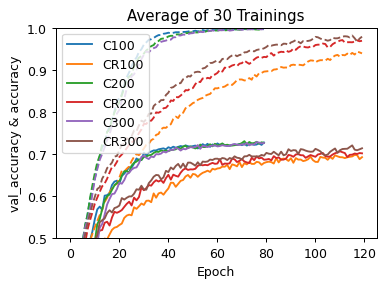

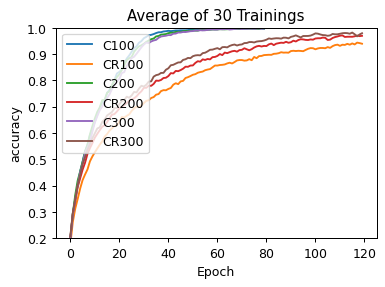

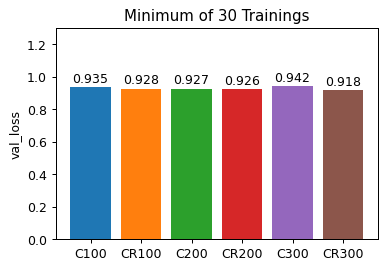

In [6]:

############# avg ###############
evaluate_bar_plot(avgs, labels, 'accuracy', window=[0, 1], figsize=(8, 1.5))
plot_graph(
    'val_loss', avgs, labels, 'upper left','Average of 30 Trainings', colors, window=[0.9, 1.3])
plot_graph(
    'val_accuracy', avgs, labels, 'lower left','Average of 30 Trainings', colors, window=[0.50, 0.75])
plot_graph(
    'val_accuracy', avgs, labels, 'upper left','Average of 30 Trainings', colors, window=[0.5, 1],  metric2='accuracy')
plot_graph(
    'accuracy', avgs, labels, 'upper left','Average of 30 Trainings', colors, window=[0.2, 1])
bar_plot(
    avgs, labels,'Minimum of 30 Trainings', 'min','val_loss', colors, window=[0, 1.3])

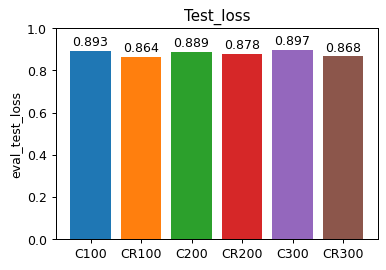

values: [0.71600002 0.69022232 0.71599996 0.69422233 0.70733339 0.68222225]


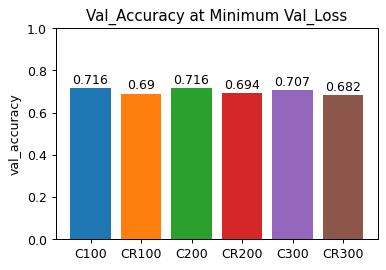

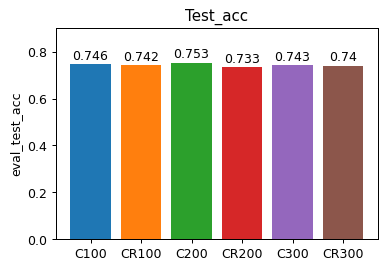

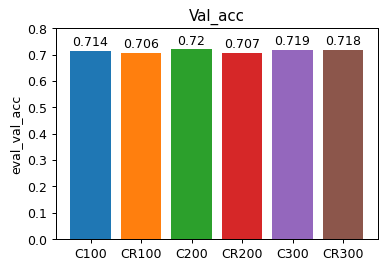

In [9]:
bar_plot(
    avgs, labels,'Test_loss', 'eval','eval_test_loss', colors, window=[0, 1])
bar_plot_loss_min(
    avgs, labels,'Val_Accuracy at Minimum Val_Loss','val_accuracy', colors, window=[0, 1])

bar_plot(
    avgs, labels,'Test_acc', 'eval','eval_test_acc', colors, window=[0, 0.9])
bar_plot(
    avgs, labels,'Val_acc', 'eval','eval_val_acc', colors, window=[0, 0.8])

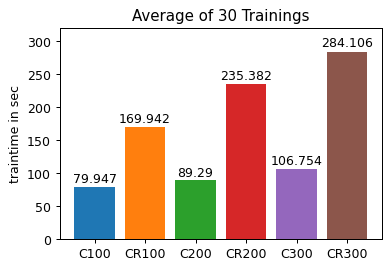

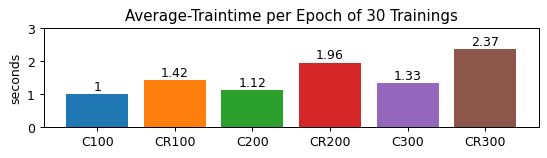

In [8]:
bar_plot(
    avgs, labels,'Average of 30 Trainings', 'max','traintime', colors,  window=[0, 320])

values = [1.00, 1.42, 1.12, 1.96, 1.33, 2.37]   
fig = plt.figure(figsize=(5.5, 1.1), dpi=90)
ax = fig.add_axes([0,0,1,1])
plt.title('Average-Traintime per Epoch of 30 Trainings')
plt.ylabel('seconds')
labels = labels
rects = ax.bar(labels, values, color=colors)
plt.ylim(top=3, bottom=0)
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
            '%g' % round(height, 3),
            ha='center', va='bottom')
plt.show()